
### 1. Visualização dos dados

In [52]:
# Importação das bibliotecas
import pandas as pd
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express  as px

# Leitura e armazenamento do CSV em um DataFrame, preparando-se para análises posteriores.
base = pd.read_csv("../datasets/census.csv")
base


age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [53]:
# Exibe umresumo estatístico do dataset em questão
base.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [54]:
# retorna a quantidade de valores nulos em cada coluna do DataFrame 'base'. Essa informação é útil para identificar colunas com valores ausentes
# o que pode exigir tratamento especial durante a análise ou modelagem de dados.
base.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [55]:
np.unique(base['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

<Axes: xlabel='income', ylabel='count'>

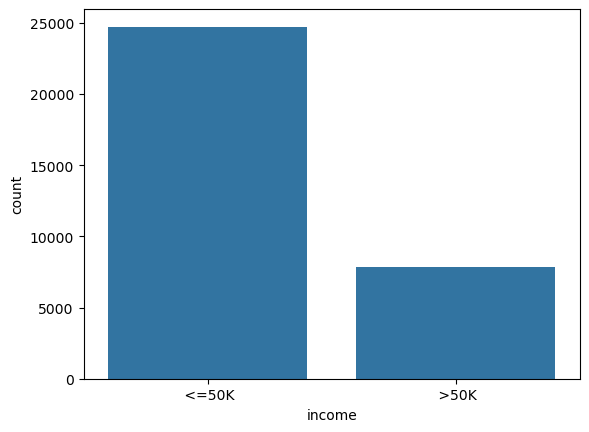

In [56]:
sn.countplot (x = base['income'])

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

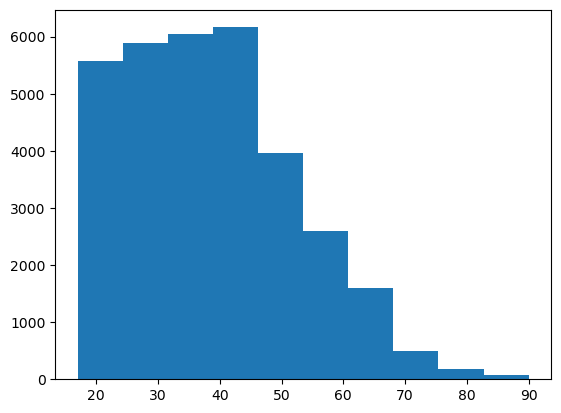

In [57]:
plt.hist(x = base['age'])

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

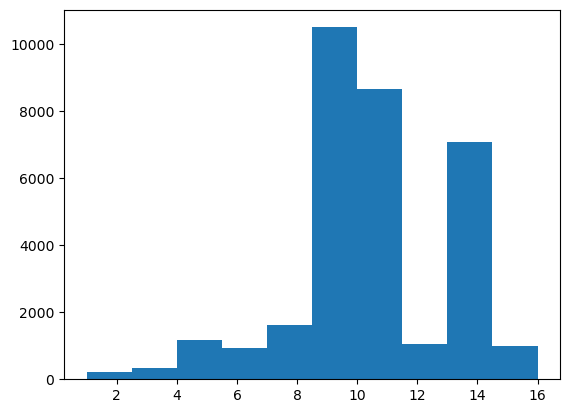

In [58]:
plt.hist(x = base['education-num'])

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

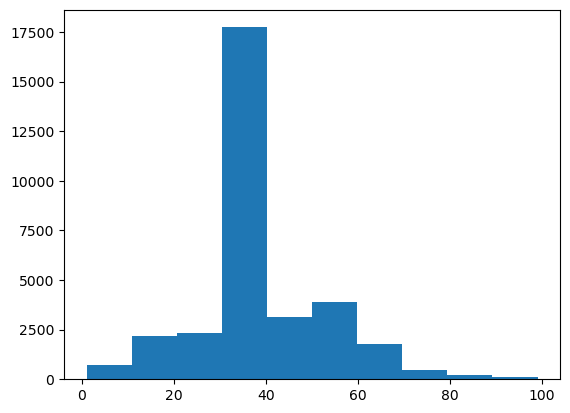

In [59]:
plt.hist(x = base['hour-per-week'])


In [60]:
grafico = px.treemap(base, path=['workclass','age'])
grafico.show()

In [61]:
grafico = px.treemap(base, path=['occupation','relationship','age'])
grafico.show()

In [62]:
grafico = px.parallel_categories(base, dimensions=['occupation','relationship'])
grafico.show()

In [63]:
grafico = px.parallel_categories(base, dimensions=['workclass','occupation','income'])
grafico.show()

In [64]:
grafico = px.parallel_categories(base, dimensions=['education','income'])
grafico.show()

### 2. Divisão entre previsores e classe
 
Em Machine Learning (Aprendizado de Máquina), ao construir um modelo para realizar previsões, é comum dividir os dados em duas partes principais: previsores (também conhecidos como features ou atributos) e classe (também chamada de rótulo ou target).

* Previsores (Features/Atributos):
Os previsores são as variáveis independentes que são usadas para prever ou explicar a variável dependente (a classe/rótulo). Em outras palavras, são as características dos dados que são fornecidas ao modelo para que ele possa fazer suas previsões. Cada amostra nos dados de treinamento é representada por um conjunto de valores de previsores. Por exemplo, se estivéssemos construindo um modelo para prever o preço de casas, os previsores poderiam incluir características como tamanho da casa, número de quartos, localização, etc.

* Classe (Rótulo/Target):
A classe é a variável que queremos prever ou classificar usando o modelo. É a variável dependente que o modelo tentará aprender a partir dos previsores. Continuando com o exemplo das casas, o preço da casa seria a classe que o modelo tentaria prever com base nas características fornecidas pelos previsores.

Com essa divisão em previsores e classe, podemos alimentar os dados de treinamento ao modelo para que ele possa aprender com eles e, em seguida, avaliar a precisão do modelo usando os dados de teste para verificar o quão bem ele consegue fazer as previsões.




In [65]:
base.columns


Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [66]:
X_census = base.iloc[:, 0:14].values 
X_census # Variável contendo os labels/atributos previsores, por padrão X refere-se aos previsores e y a classe que será prevista, neste caso -> income


array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [67]:
y_census = base.iloc[:, 14].values
y_census # Variável contendo a classe

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### 3. Tratamento de atributos categóricos

O tratamento de dados categóricos é uma etapa importante no pré-processamento de dados antes de aplicar técnicas de Machine Learning, especialmente quando se trabalha com algoritmos que exigem números como entrada. Dados categóricos são variáveis que representam grupos ou categorias, em vez de valores numéricos contínuos. Essas categorias não possuem uma ordem ou significado numérico intrínseco.

Existem duas principais técnicas para tratar dados categóricos:

* `1. Codificação de rótulos (Label Encoding):`
A codificação de rótulos é usada para transformar os valores categóricos em números inteiros. Cada categoria recebe um valor numérico único. Essa técnica é útil quando as categorias possuem uma relação ordinal, ou seja, uma ordem significativa entre elas. No entanto, não é recomendado quando não há relação de ordem, pois os números atribuídos podem ser interpretados erroneamente pelo modelo como um relacionamento ordenado.

_EXEMPLO: Suponha que você tenha um dataset com a coluna educationlevel que contém os seguintes valores categóricos: ["High School", "Bachelor's", "Master's","PhD"]. Esses valores têm uma ordem intrínseca, onde "High School" é o nível educacional mais baixo e "PhD" é o mais alto._

Neste caso, é apropriado usar o Label Encoder, pois ele preserva a ordem dos dados:

"High School" -> 0
"Bachelor's" -> 1
"Master's" -> 2
"PhD" -> 3
O algoritmo de aprendizado de máquina pode interpretar que, quanto maior o número, maior o nível de educação, o que faz sentido neste contexto.


#
* `2. Codificação one-hot (One-Hot Encoding):`
A codificação one-hot é utilizada quando não há relação de ordem entre as categorias. Nessa técnica, cada categoria é transformada em um novo atributo binário (0 ou 1), representando sua presença ou ausência para cada amostra. Isso cria uma matriz esparsa em que apenas um atributo será igual a 1 e os outros serão 0 para cada amostra. Essa abordagem evita que o modelo interprete erroneamente relações de ordem e é geralmente preferida quando se trabalha com dados categóricos.

_EXEMPLO: Suponha que você tenha um dataset com a coluna color que contém os seguintes valores categóricos: ["red", "green", "blue"]. Essas categorias não têm uma ordem intrínseca._

Neste caso, é apropriado usar o One Hot Encoder, pois ele trata cada categoria como independente e não introduz uma ordem fictícia:

"red" -> [1, 0, 0]
"green" -> [0, 1, 0]
"blue" -> [0, 0, 1]
Isso evita que o algoritmo de aprendizado de máquina interprete que uma cor é maior ou menor que a outra, preservando a independência entre as categorias


### Label Encoder

In [68]:
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [69]:
from sklearn.preprocessing import LabelEncoder
label_enconder_teste = LabelEncoder() # Instanciando um objeto da classe LabelEncoder


In [70]:
teste = label_enconder_teste.fit_transform(X_census[:, 1])
teste

array([7, 6, 4, ..., 4, 4, 5])

In [71]:
base.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [72]:
# Cada instância de LabelEncoder() é usada para codificar uma coluna específica do 
# DataFrame 'base' em números inteiros. transformar dados categóricos em números 
# inteiros, permitindo que algoritmos de aprendizado de máquina trabalhem com esses dados.

label_enconder_workclass = LabelEncoder()
label_enconder_education = LabelEncoder()
label_enconder_marital_status = LabelEncoder()
label_enconder_occupation = LabelEncoder()
label_enconder_relationship = LabelEncoder()
label_enconder_race = LabelEncoder()
label_enconder_sex = LabelEncoder()
label_enconder_native_country = LabelEncoder()

In [73]:
# Substituição dos valores categóricos nas respectivas colunas pelos valores 
# numéricos codificados gerados pelo LabelEncoder(). 

X_census[:, 1] = label_enconder_workclass.fit_transform(X_census[:, 1])
X_census[:, 3] = label_enconder_education.fit_transform(X_census[:, 3])
X_census[:, 5] = label_enconder_marital_status.fit_transform(X_census[:, 5])
X_census[:, 6] = label_enconder_occupation.fit_transform(X_census[:, 6])
X_census[:, 7] = label_enconder_relationship.fit_transform(X_census[:, 7])
X_census[:, 8] = label_enconder_race.fit_transform(X_census[:, 8])
X_census[:, 9] = label_enconder_sex.fit_transform(X_census[:, 9])
X_census[:, 13] = label_enconder_native_country.fit_transform(X_census[:, 13]) 


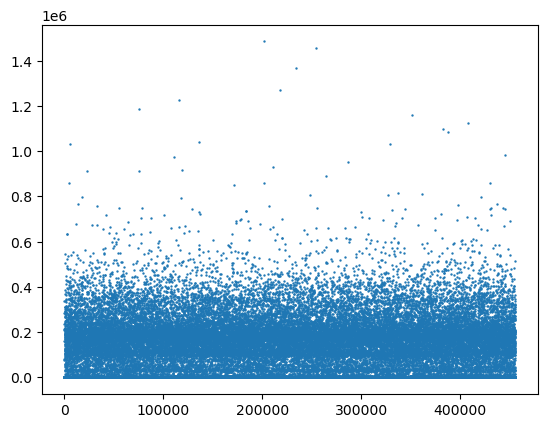

In [74]:
plt.figure()
#plt.plot(X_census.flatten())
plt.scatter(np.arange(len(X_census.flatten())), X_census.flatten(), s=0.5)
plt.show()

### One Hot Encoder
 

In [75]:
np.unique(base['workclass'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [76]:
len(np.unique(base['workclass']))

9

In [77]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [78]:
onehotencoder_census = ColumnTransformer(transformers=[('Onehot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passtrough')

In [79]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [80]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [81]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [82]:
X_census.shape

(32561, 108)

## 4. Escalonamento de valores

O escalonamento de valores, também conhecido como normalização, é um procedimento comum de pré-processamento de dados usado em Machine Learning. Essa técnica é aplicada para ajustar os valores das variáveis (ou atributos) em um conjunto de dados para uma escala específica, geralmente com o objetivo de facilitar o treinamento e melhorar o desempenho do modelo.

O escalonamento é importante porque muitos algoritmos de Machine Learning são sensíveis à escala dos atributos e podem ser influenciados por diferenças nas unidades de medida ou na amplitude dos valores. Sem o escalonamento, atributos com valores grandes podem dominar atributos com valores menores, levando o modelo a dar mais importância a esses atributos maiores e, potencialmente, prejudicar o desempenho geral.

Existem duas técnicas comuns de escalonamento de valores

#### **A. Padronização (Standardization):**
Na padronização, os valores de cada atributo são transformados para terem média 0 e desvio padrão 1. A fórmula para a padronização é a seguinte:

\begin{equation}
x_{\text{normalizado}} = \frac{x - \mu}{\sigma}
\end{equation}

Onde:

- X é o valor original do atributo.
- $\mu$ é a média dos valores do atributo no conjunto de dados.
- $\sigma$ é o desvio padrão dos valores do atributo no conjunto de dados.

A padronização é útil quando os valores dos atributos possuem distribuição Gaussiana, e também quando algoritmos de otimização, como os gradient-based, podem se beneficiar de atributos com média zero e desvio padrão unitário.
#
#

#### **B. Normalização (MinMax Scaling):**
Na normalização, os valores de cada atributo são transformados para um intervalo específico, geralmente entre 0 e 1. A fórmula para a normalização é a seguinte:

\begin{equation}
X_{\text{normalizado}} = \frac{{X - X_{\text{min}}}}{{X_{\text{max}} - X_{\text{min}}}}
\end{equation}

Onde:

- $X$ é o valor original do atributo.
- $X_min$ é o valor mínimo do atributo no conjunto de dados.
- $X_max$ é o valor máximo do atributo no conjunto de dados.

Essa técnica é útil quando os valores dos atributos não seguem uma distribuição Gaussiana e possuem valores limitados dentro de um intervalo específico.


O escalonamento de valores é uma etapa importante no pré-processamento de dados e deve ser realizado antes de alimentar os dados ao modelo de Machine Learning, ajudando a melhorar a performance do modelo e evitar problemas causados por diferenças nas escalas dos atributos.







In [83]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [84]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [85]:
X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

In [86]:
X_census.shape


(32561, 108)

### 5. Divisão das bases em treinamento e teste   

A divisão das bases de dados em treinamento e teste é uma prática comum em aprendizado de máquina e mineração de dados para avaliar o desempenho de um modelo preditivo ou classificador. Essa técnica é usada para medir quão bem o modelo generaliza para dados não vistos, ou seja, para dados que não foram usados durante o treinamento.

A ideia básica é dividir o conjunto de dados disponível em duas partes distintas:

- A. **Conjunto de Treinamento (Training Set)**: É a parte do conjunto de dados utilizada para treinar o modelo. O modelo é ajustado ou "aprende" com esses dados para fazer previsões ou classificações futuras.

- B. **Conjunto de Teste (Test Set)**: É a parte do conjunto de dados reservada para avaliar o desempenho do modelo. Depois que o modelo é treinado, ele é testado com esses dados para medir sua capacidade de generalização. O modelo faz previsões para os dados de teste e as compara com as respostas corretas conhecidas (rótulos ou valores reais) para avaliar sua precisão.

Essa divisão é essencial para evitar o overfitting, que ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas não consegue generalizar para novos dados. Se não houver uma divisão clara entre os conjuntos de treinamento e teste, o modelo pode simplesmente memorizar os dados de treinamento em vez de aprender padrões gerais, e seu desempenho será superestimado.

A proporção típica de divisão entre treinamento e teste é de cerca de 70-80% dos dados para treinamento e 20-30% para teste, mas isso pode variar dependendo do tamanho do conjunto de dados disponível e da complexidade do problema.

Além da divisão em treinamento e teste, em alguns casos mais avançados, pode-se utilizar uma terceira divisão chamada "conjunto de validação" (validation set), que é usado para ajustar os hiperparâmetros do modelo e fazer ajustes finos antes de avaliar o desempenho no conjunto de teste. Essa técnica é conhecida como "validação cruzada" (cross-validation) e é particularmente útil quando há um número limitado de dados disponíveis.

In [87]:
from sklearn.model_selection import train_test_split


In [88]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size = 0.15, random_state = 0)


In [89]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [90]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

O trecho abaixo salva os conjuntos de dados de treinamento e teste, bem como seus rótulos associados, em um arquivo binário usando a biblioteca pickle. Isso pode ser útil para preservar as alterações feitas no pré-processamento, para que possam ser carregados e usados posteriormente em diferentes sessões ou partes do código.

In [91]:
import pickle 
with open('census.pkl', mode = 'wb') as f: # Abre um arquivo chamado 'census.pkl' no modo de escrita binária ('wb')
    # Usa a biblioteca pickle para serializar e salvar os dados no arquivo 'census.pkl'
    # Os dados sendo salvos são uma lista contendo os seguintes elementos:
    # X_census_treinamento: Conjunto de dados de treinamento (atributos) do censo
    # y_census_treinamento: Conjunto de dados de treinamento (rótulos) do censo
    # X_census_teste: Conjunto de dados de teste (atributos) do censo
    # y_census_teste: Conjunto de dados de teste (rótulos) do censo
    pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)

In [92]:
with open('census.pkl', 'rb') as f:
    # Abre o arquivo 'census.pkl' no modo de leitura binária ('rb')
    # Usa a biblioteca pickle para desserializar os dados do arquivo e carregar nas variáveis
    # X_census_treinamento, y_census_treinamento, X_census_teste e y_census_teste
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

O trecho acima carrega os dados previamente salvos do arquivo 'census.pkl' de volta para as variáveis Python, permitindo que você recupere os conjuntos de dados de treinamento e teste, bem como seus rótulos, para continuar a análise ou modelagem dos dados.

In [93]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

### 7. Modelo com Naive Bayes

O Naive Bayes é um algoritmo de classificação probabilístico que se baseia no Teorema de Bayes para fazer previsões sobre a classe de um dado, dadas as características desse dado. É especialmente útil quando se trabalha com dados que possuem múltiplas características (atributos) e se deseja categorizá-los em classes distintas.

A ideia central do Naive Bayes é usar a probabilidade condicional para calcular a probabilidade de uma determinada classe ocorrer, dado um conjunto de características. A suposição "ingênua" (naive) é que as características são independentes entre si, o que nem sempre é verdade na prática, mas essa simplificação muitas vezes funciona bem o suficiente para muitas aplicações.


\begin{equation}    
$$P(C_k|X) = \frac{{P(X|C_k) \cdot P(C_k)}}{{P(X)}}$$s
\end{equation}

In [94]:
from sklearn.naive_bayes import GaussianNB

naive_census_data = GaussianNB() # Cria uma instância do classificador Naive Bayes com a distribuição Gaussiana (GaussianNB)

naive_census_data.fit(X_census_treinamento, y_census_treinamento) # Treina o modelo Naive Bayes com os dados de treinamento padronizados e seus rótulos


GaussianNB()

In [95]:
predict = naive_census_data.predict(X_census_teste) # Faz previsões usando o modelo Naive Bayes treinado nos dados de teste e armazena na variavel predict

predict

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [96]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_census_teste, predict) # acurácia maior caso não seja realizado o escalonamento, neste caso 

0.4767656090071648

In [98]:
confusion_matrix(y_census_teste, predict)

array([[1172, 2521],
       [  35, 1157]])

In [99]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

### Matriz de Confusão

Um a matriz de confusão é uma ferramenta usada em análise de classificação para avaliar o desempenho de um modelo em prever as classes corretas para diferentes instâncias de dados. Ela é especialmente útil quando se trata de problemas de classificação binária, onde você tem duas classes possíveis (por exemplo, positivo e negativo, sim e não, etc.). No entanto, ela pode ser estendida para problemas de classificação multiclasse.

Uma matriz de confusão é organizada em quatro categorias principais:

- Verdadeiro Positivo (TP): Número de instâncias que foram classificadas corretamente como positivas.

- Falso Positivo (FP): Número de instâncias que foram erroneamente classificadas como positivas, mas deveriam ter sido negativas.

- Verdadeiro Negativo (TN): Número de instâncias que foram classificadas corretamente como negativas.

- Falso Negativo (FN): Número de instâncias que foram erroneamente classificadas como negativas, mas deveriam ter sido positivas.

Essas categorias são dispostas em uma matriz, onde as linhas representam as classes reais e as colunas representam as classes previstas pelo modelo.

Aqui está um exemplo simplificado de uma matriz de confusão do modelo de previsão anterior para a base_census:

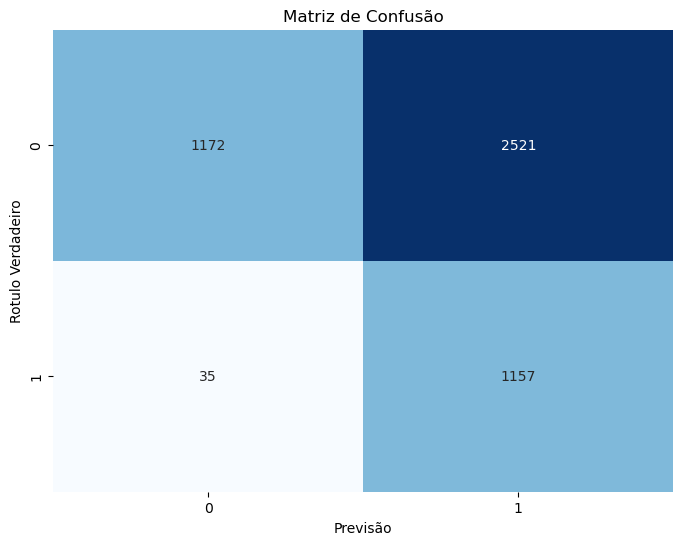

In [100]:
y_true = y_census_teste  # Rótulos verdadeiros
y_pred = predict  # Previsões do modelo

# Calcula a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plota a matriz de confusão como um mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Rotulo Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [101]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_census_teste, predict))


              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

